## Group No 297

## Group Member Names:
1. Chakradhar Kowsik 2020FC04737
2. Piyush Pawar 2021FC04728
3. Santhosh Mathai 2021FA04008

# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

### 1. Problem Statement  
Developing a Deep learning model for a Bank Marketing Dataset, With the given data to find out whether the customer will subscribe to a Term Deposite by analysing a Bank Marketing Dataset.
#### 2. Problem Kind
 We are trying to classify customer into two groups either subscriber or not so we are trying to solve **classification** problem. To be more precise it is binary classification problem.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os.path
import time
from datetime import datetime,date,time
import requests
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random as rn


In [2]:
class Util:
    def __init__(self):
        pass
    def downloadfile(self,data_zip_url,zip_filename):
        start_time = datetime.now()
        if not os.path.exists(zip_filename):
            print('Downloading the zip file from source {}.'.format(data_zip_url))
            zip_file = None
            try:
                resp=requests.get(data_zip_url,verify=False)
                if resp.status_code ==200:
                    print('Downloaded file successfully.')
                    print('Saving Zipfile {} to disk'.format(zip_filename))
                    zip_file = open(zip_filename,'wb')
                    zip_file.write(resp.content)
                else:
                    print('Downloading file failed!')
            except ex:
                print('Downloading file failed!')
            finally:
                if zip_file != None:
                    zip_file.close()
        else:
            print('File {} already downloaded'.format(zip_filename)) 
        end_time = datetime.now()
        print('Time taken to download and save is {}'.format(end_time- start_time))
                    
    def createfile(self,csv_filename):
        start_time = datetime.now()
        if not os.path.exists(csv_filename):
            csv_file = None
            zip_csv_file = None
            try:
                zip_csv_file = zip.open('bank-additional/'+csv_filename,'r')
                print('Creating file {}.'.format(csv_filename))        
                csv_file = open(csv_filename,'wb')
                csv_file.write(zip_csv_file.read())
            except ex:
                print('An error occurred while creating file {}'.format(csv_filename))
            finally:
                if csv_file != None:
                    csv_file.close()
                if zip_csv_file != None:
                    zip_csv_file.close()
        else: 
            print('File {} already exists in current directory'.format(csv_filename))
        end_time = datetime.now()
        print('Time taken to download and save is {}'.format(end_time- start_time))
util_obj= Util()

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [3]:
##---------Type the code below this line------------------##

In [4]:
data_zip_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
zip_filename = 'bank-additional.zip'
util_obj.downloadfile(data_zip_url,zip_filename)

File bank-additional.zip already downloaded
Time taken to download and save is 0:00:00.000332


In [5]:
zip= ZipFile(zip_filename)
print('List of file in zip {}'.format(zip_filename))
zip.printdir()

List of file in zip bank-additional.zip
File Name                                             Modified             Size
bank-additional/                               2014-03-26 11:28:00            0
bank-additional/.DS_Store                      2014-03-25 10:52:16         6148
__MACOSX/                                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/._.DS_Store           2014-03-25 10:52:16           82
bank-additional/.Rhistory                      2014-03-25 16:27:14         3943
bank-additional/bank-additional-full.csv       2014-03-26 11:22:30      5834924
bank-additional/bank-additional-names.txt      2014-03-26 11:27:36         5458
bank-additional/bank-additional.csv            2014-03-26 11:23:34       583898
__MACOSX/._bank-additional                     2014-03-26 11:28:00          205


In [6]:
csv_filename = 'bank-additional-full.csv'
util_obj.createfile(csv_filename)

Creating file bank-additional-full.csv.
Time taken to download and save is 0:00:00.023591


## 2.2 Code for converting the above downloaded data into a form suitable for DL 

**Since in the data set it is indicated that None is replaced in data set with unknown, so while reading making it as None.**

In [7]:
##---------Type the code below this line------------------##

In [8]:
df = pd.read_csv(csv_filename,delimiter=";",index_col=None,na_values=['unknown'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

In [9]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.size)

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

# Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")

   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
  17. cons.price.idx: consumer price index. monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate. daily indicator (numeric)
  20. nr.employed: number of employees. quarterly indicator (numeric)

# Output variable (desired target):
  21. y. has the client subscribed a term deposit? (binary: "yes","no")
  


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [10]:
null_cols=[]

for col in df.columns:
    #print(df[col].unique())
    null_count = df[col].isna().sum()
    if null_count>0:
        print(col, null_count)
        null_cols.append(col)

job 330
marital 80
education 1731
default 8597
housing 990
loan 990


In [11]:
##---------Type the code below this line------------------##

In [12]:
df.apply(pd.value_counts)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
-50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN
-50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,282.0,NaN,NaN,NaN
-49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN
-47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2458.0,NaN,NaN,NaN
-46.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5794.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unemployed,NaN,1014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
university.degree,NaN,NaN,NaN,12168.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mdf= df.copy()
# We need to drop this duration column as this is identical to output parameter 
#i.e. duration>0 then subscribed but this will be noted 
#only when user calls so if he is saying greater than 0 we obviously know he has subscribed or not
mdf = mdf.drop(['duration'],axis=1)
mdf = mdf.dropna()
print('The {} % of original data set contains all information'.format(round(mdf.shape[0]/df.shape[0],4)*100))
print('The columns considered for next step {}'.format(mdf.columns))
len(mdf.columns)

The 74.02 % of original data set contains all information
The columns considered for next step Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


20

In [14]:
display(mdf)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
##---------Type the code below this line------------------##

## 3.2 Encode categorical data

In [16]:
#identify categorical columns
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(mdf)
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

<AxesSubplot: ylabel='y'>

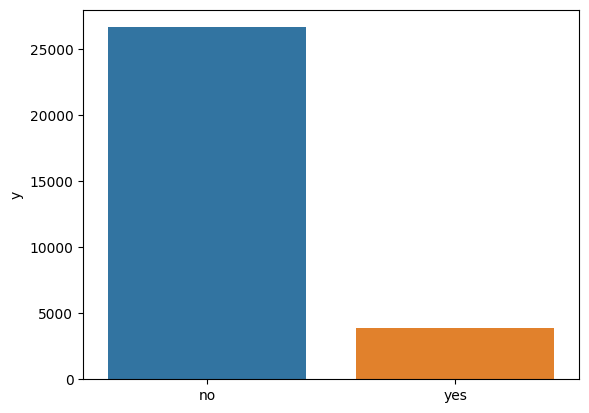

In [17]:
sns.barplot(x=mdf['y'].value_counts().index,y=mdf['y'].value_counts())

#### There is odd distribution in yes and no values of target variable so we need to correct the data by inducing rows into data set

(53642, 20)

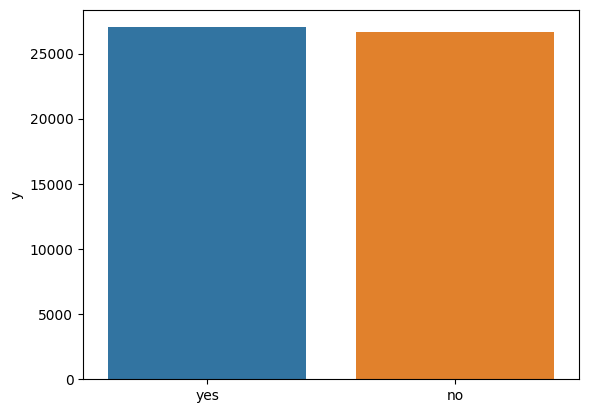

In [18]:
y_with_yes_values = mdf[mdf['y']=='yes']
while len(mdf[mdf['y']=='yes'])/len(mdf[mdf['y']=='no'])< 0.90:
    mdf=pd.concat([mdf, y_with_yes_values])
sns.barplot(x=mdf['y'].value_counts().index,y=mdf['y'].value_counts())
mdf.shape

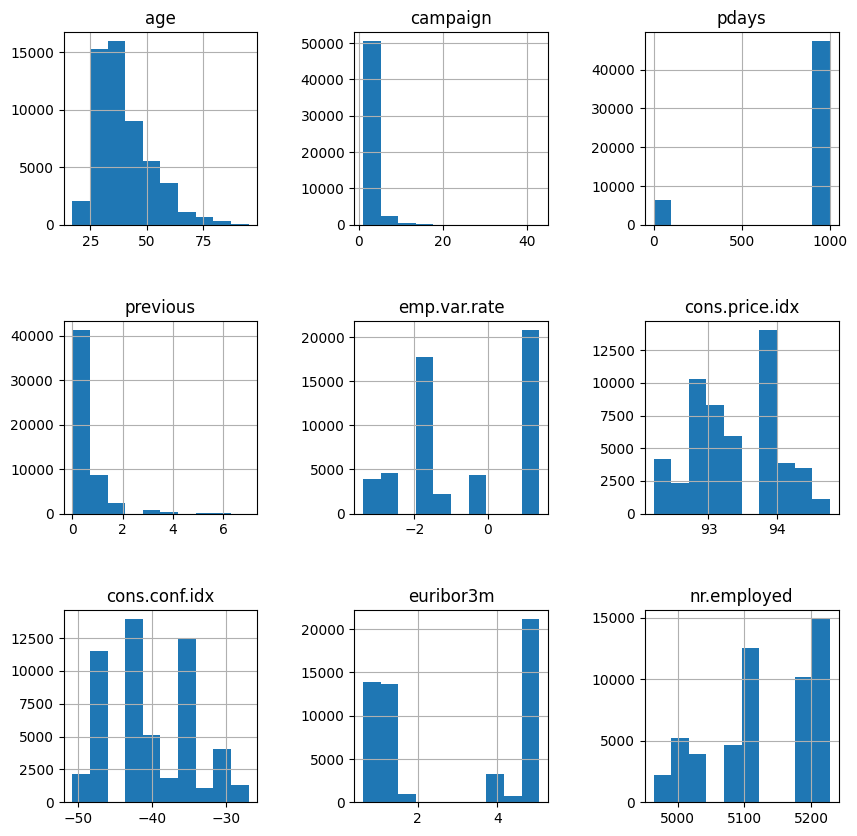

In [19]:
import matplotlib.pyplot as plt
cols = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
mdf.hist(column=cols,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

#### We can clearly see the pdays is having only two values with huge difference so 

In [20]:
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
mdf['pdays2']=mdf.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
mdf['pdays']=mdf.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
mdf['pdays']=mdf['pdays'].astype(int)
mdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [21]:
nominal = ['job','marital','education','contact','month','day_of_week']
mdf = pd.get_dummies(mdf,columns=nominal)
mdf['y']=mdf['y'].map({'yes': 1,'no': 0})
mdf.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,no,no,no,1,30,0,nonexistent,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,37,no,yes,no,1,30,0,nonexistent,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,40,no,no,no,1,30,0,nonexistent,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,56,no,no,yes,1,30,0,nonexistent,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
6,59,no,no,no,1,30,0,nonexistent,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


In [22]:
mdf.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [24]:
mdf['poutcome'] = mdf['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
mdf['default'] = mdf['default'].map({'yes': -1,'no': 1})
mdf['housing'] = mdf['housing'].map({'yes': -1,'no': 1})
mdf['loan'] = mdf['loan'].map({'yes': -1,'no': 1})

In [25]:
df_corr = mdf.drop(['y'],axis=1).corr()

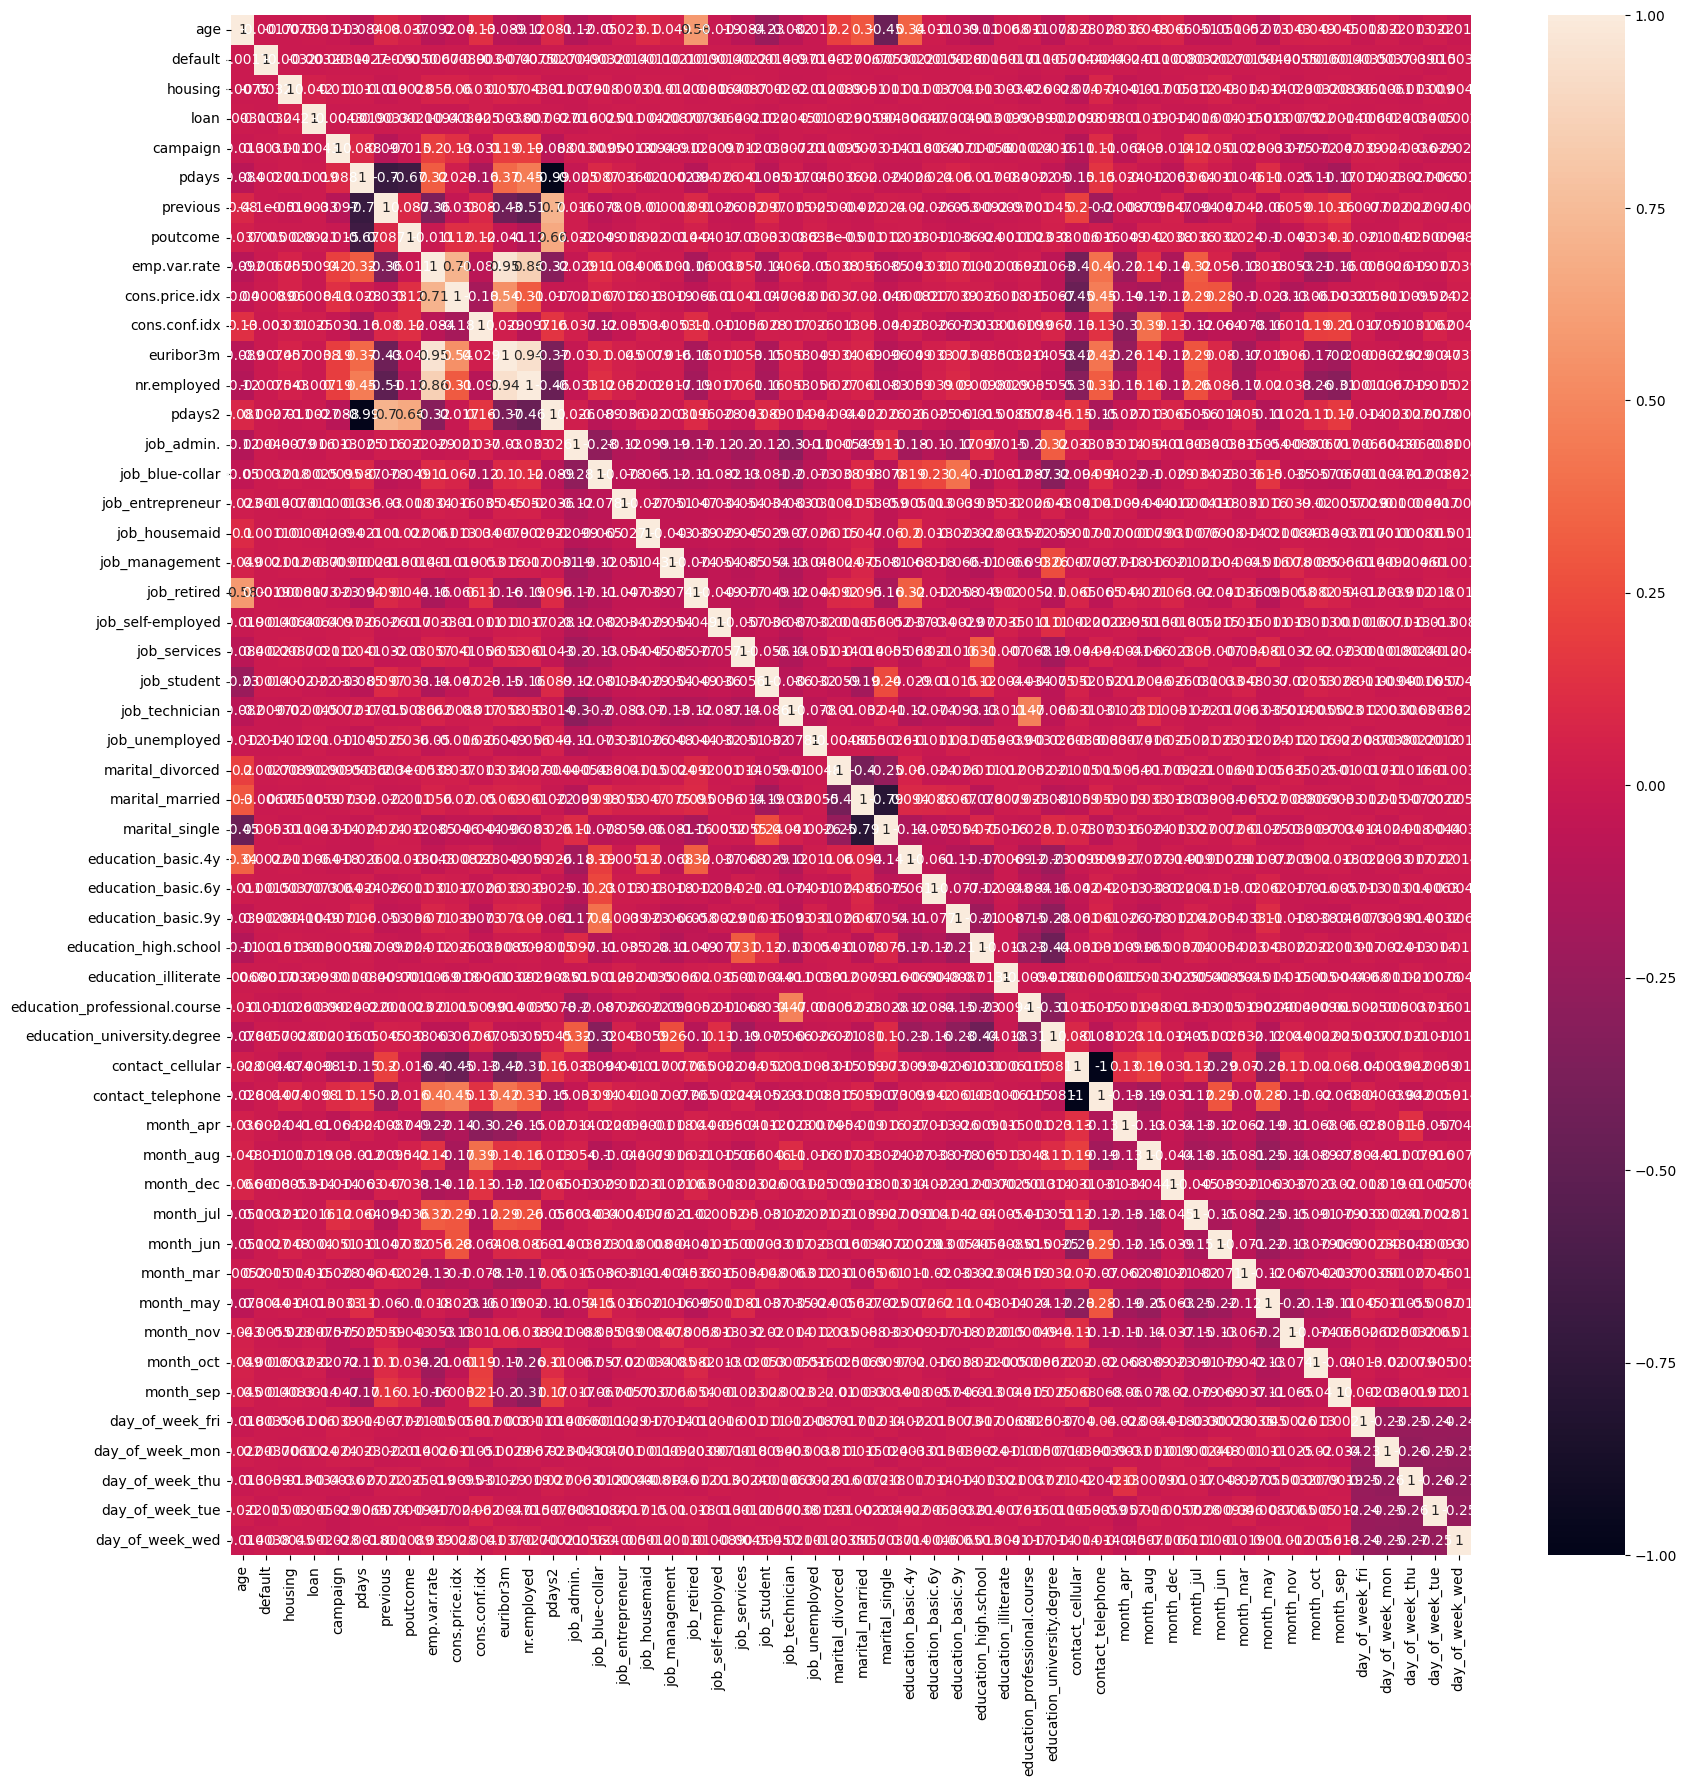

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot = True)
plt.show()

## 3.3 Normalize the data

In [27]:
cols = ['age','campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']
labels = mdf.y
scaler = MinMaxScaler()
for col in cols:
    mdf[cols] = scaler.fit_transform(mdf[cols])

In [28]:
mdf.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.500000,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.256410,1,-1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.294872,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.500000,1,1,-1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
6,0.538462,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


## 3.4 Feature Engineering 

if any

In [29]:
#---

## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [30]:
y=mdf.y
x_scaled = mdf.drop(['y'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37549, 52)
(16093, 52)
(37549,)
(16093,)


## 3.6 Split the data into training set and testing set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
feature_train, feature_val, label_train, label_val = train_test_split(x_train, y_train, test_size = 0.1)

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [33]:
##---------Type the code below this line------------------##

In [34]:
model = Sequential()

model.add(Dense(52, input_dim=52, activation='relu', name= 'input'))
#model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64,  activation='relu', name= 'hidden_2'))
model.add(Dense(128, activation='relu', name= 'hidden_3'))
model.add(Dense(256,  activation='relu', name= 'hidden_4'))
model.add(Dense(512, activation='relu', name= 'hidden_5'))
model.add(Dense(1, input_dim=52, activation='sigmoid', name= 'output'))

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

##---------Type the answer below this line------------------##

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [35]:
##---------Type the code below this line------------------##

In [36]:
opt = Adam(learning_rate= 0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics= ['accuracy'])

In [37]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 52)                2756      
                                                                 
 hidden_2 (Dense)            (None, 64)                3392      
                                                                 
 hidden_3 (Dense)            (None, 128)               8320      
                                                                 
 hidden_4 (Dense)            (None, 256)               33024     
                                                                 
 hidden_5 (Dense)            (None, 512)               131584    
                                                                 
 output (Dense)              (None, 1)                 513       
                                                                 
Total params: 179,589
Trainable params: 179,589
Non-trai

## 5.2 Train the model

In [38]:
##---------Type the code below this line------------------##

In [39]:
training_results = model.fit(feature_train, label_train, verbose=1, batch_size=175, epochs=200 , validation_data= (feature_val,label_val))

Epoch 1/200
194/194 [==============================] - 1s 4ms/step - loss: 0.5461 - accuracy: 0.7360 - val_loss: 0.5524 - val_accuracy: 0.7302
Epoch 2/200
194/194 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.7575 - val_loss: 0.5334 - val_accuracy: 0.7457
Epoch 3/200
194/194 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7634 - val_loss: 0.5264 - val_accuracy: 0.7454
Epoch 4/200
194/194 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.7735 - val_loss: 0.5381 - val_accuracy: 0.7385
Epoch 5/200
194/194 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7816 - val_loss: 0.5137 - val_accuracy: 0.7507
Epoch 6/200
194/194 [==============================] - 1s 3ms/step - loss: 0.4551 - accuracy: 0.7898 - val_loss: 0.5071 - val_accuracy: 0.7643
Epoch 7/200
194/194 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8002 - val_loss: 0.4875 - val_accuracy: 0.7670

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##
##### As the previously summerized we are doing classification, and using Adam optimizer and choosed binary cross entropy as we have binary classificaion
##### and we have a output of sigmoid since the probability might occur in between 0 to 1 so if we round off the output values we will get the correct accuracy



# 6. Test the model

Score: 2 Marks

In [40]:
##---------Type the code below this line------------------##

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


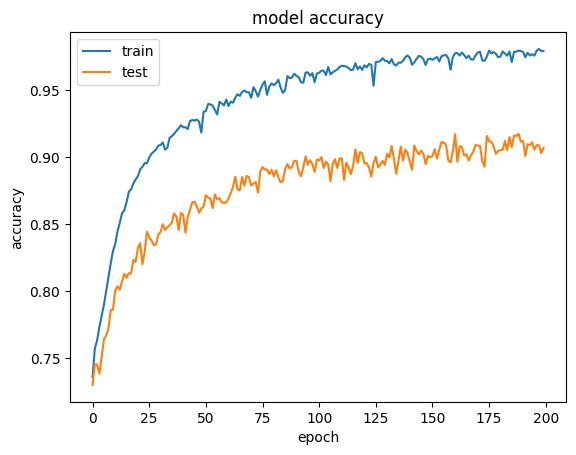

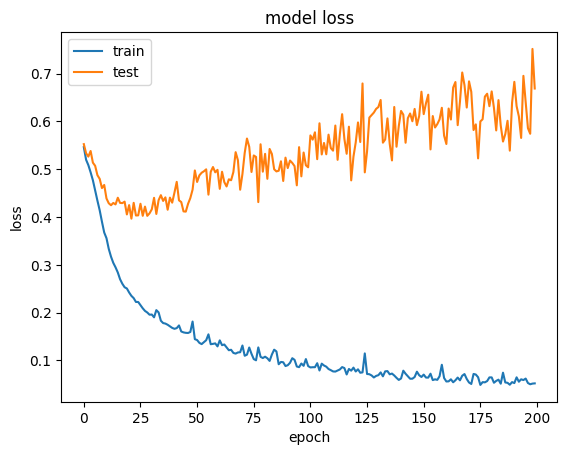

In [41]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
results = model.evaluate(x_test, y_test)
results

503/503 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.9178


[0.5990447402000427, 0.9177903532981873]

In [43]:
y_pred= model.predict(x_test)

503/503 [==============================] - 1s 1ms/step


In [44]:
y_pred.round().astype(int).shape

(16093, 1)

In [45]:
print(y_pred.round().astype(int))
y_test

[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


25005    0
24342    0
28766    1
14297    0
37720    1
        ..
33760    1
22192    1
30207    1
40319    0
8348     0
Name: y, Length: 16093, dtype: int64

## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

In [46]:
##---------Type the code below this line------------------##

(2, 2)
[[7863  122]
 [5794 2314]]


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

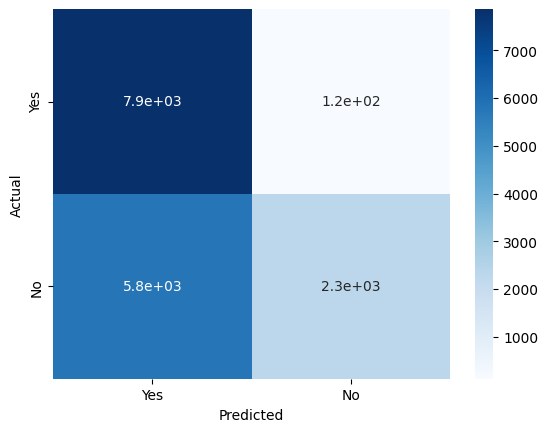

In [47]:
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)
heatmap_labels = ['Yes','No']
df_cm = pd.DataFrame(conf_matrix.numpy(), columns=heatmap_labels, index = heatmap_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#print(dir(conf_matrix))
print(conf_matrix.shape)
print(conf_matrix.numpy())

sns.heatmap(df_cm,cmap='Blues',annot=True)

In [48]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 Score: ", f1_score(y_test, y_pred.round(), average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred.round(), average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred.round(), average="macro")) 

F1 Score:  0.9173815577977342
Precision Score:  0.9248006594068143
Recall Score:  0.9173063069352718


## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

#### The problem is solved using deep learning models, if we carefully observe there is a increase in loss values as well and as well as increase in 
#### accuracy. Which tells that model is not over fitted to particular to confined result set but predictions are very near. and the false positive rates are high, so we can dig deeper to the data set and see which parameter is causing issue and we can reduce the loss and false positve. Model is having a decent accuracy scores and othe merices like F1 scor, Precision, Recall.
coming to the challenges & learning part there are many challenges faced during building the model which made the things to learn :)
1. The data is skewed so correcting the data set is challenging.
2. There are few columns which lead to overfitting such as duration so careful study of the data set is necessary.
3. There are missing values imputation will lead to any undesired circumstances like skewness changing distribution of original data should be carefully observed.
4. The data set is mix of ordinal, nominal values so different techniques are needed to standardize and normalize data
5. Finally choosing the right kind of mix and match of the layers and corresponding optimizers and activation functions

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck